In [81]:
import networkx as nx
import matplotlib.pyplot as plt
import time
import numpy as np

In [22]:
G = nx.Graph()

G.add_node('a')
G.add_node('b')
G.add_node('c')

G.add_edge('a', 'b')
G.add_edge('b', 'c')
G.add_edge('c', 'a')

{}

In [16]:
G.adj['a']

AtlasView({'c': {}, 'b': {}})

In [15]:
G.degree['a']

2

In [19]:
G['a']

AtlasView({'c': {}, 'b': {}})

### Atributes


In [24]:
G = nx.Graph(nome='Exemplo')
G.graph

{'nome': 'Exemplo'}

In [26]:
G.add_node('a', cor=(1, 0, 0))
G.add_node('b', cor=(0, 1, 0))
G.add_node('c', cor=(0, 0, 1))

G.add_edge('a', 'b', peso=2)
G.add_edge('b', 'c', peso=-1)
G.add_edge('c', 'a', peso=0)

G.graph

{'nome': 'Exemplo'}

In [28]:
list(G.adjacency())

[('a', {'b': {'peso': 2}, 'c': {'peso': 0}}),
 ('c', {'a': {'peso': 0}, 'b': {'peso': -1}}),
 ('b', {'a': {'peso': 2}, 'c': {'peso': -1}})]

In [31]:
G['a']

AtlasView({'c': {'peso': 0}, 'b': {'peso': 2}})

In [33]:
G['a']['b']

{'peso': 2}

In [36]:
Gc = nx.complement(G)

list(Gc.adjacency())

[('a', {}), ('c', {}), ('b', {})]

In [41]:
K35 = nx.complete_bipartite_graph(3, 5)

K35c = nx.complement(K35)


list(K35.adjacency())

[(0, {3: {}, 4: {}, 5: {}, 6: {}, 7: {}}),
 (1, {3: {}, 4: {}, 5: {}, 6: {}, 7: {}}),
 (2, {3: {}, 4: {}, 5: {}, 6: {}, 7: {}}),
 (3, {0: {}, 1: {}, 2: {}}),
 (4, {0: {}, 1: {}, 2: {}}),
 (5, {0: {}, 1: {}, 2: {}}),
 (6, {0: {}, 1: {}, 2: {}}),
 (7, {0: {}, 1: {}, 2: {}})]

In [43]:
list(K35c.adjacency())

[(0, {1: {}, 2: {}}),
 (1, {0: {}, 2: {}}),
 (2, {0: {}, 1: {}}),
 (3, {4: {}, 5: {}, 6: {}, 7: {}}),
 (4, {3: {}, 5: {}, 6: {}, 7: {}}),
 (5, {3: {}, 4: {}, 6: {}, 7: {}}),
 (6, {3: {}, 4: {}, 5: {}, 7: {}}),
 (7, {3: {}, 4: {}, 5: {}, 6: {}})]

In [44]:
list(nx.connected_components(K35))

[{0, 1, 2, 3, 4, 5, 6, 7}]

In [45]:
list(nx.connected_components(K35c))

[{0, 1, 2}, {3, 4, 5, 6, 7}]

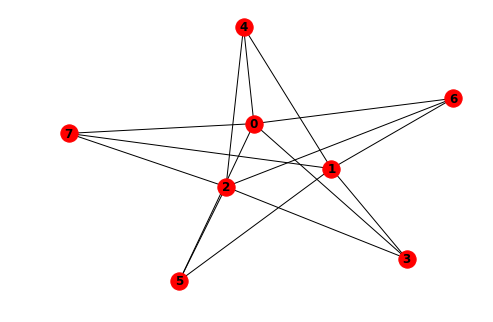

In [50]:
nx.draw(K35, with_labels=True, font_weight='bold')

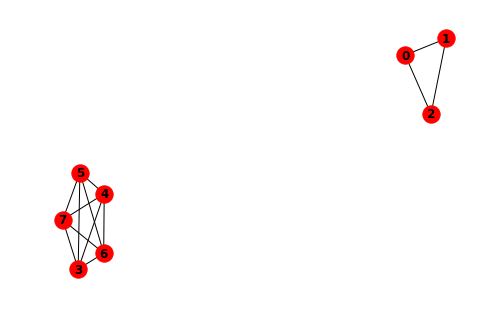

In [51]:
nx.draw(K35c, with_labels=True, font_weight='bold')

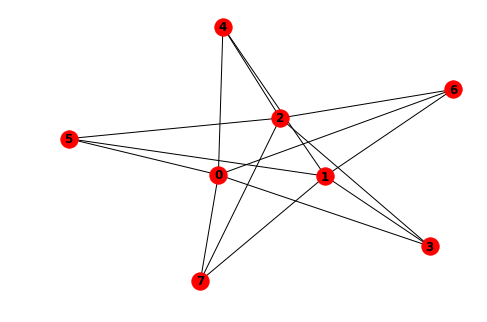

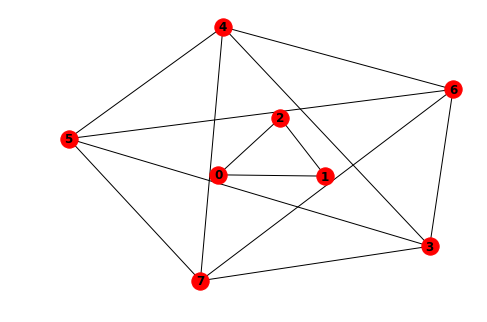

In [52]:
positions = nx.spring_layout(K35)

plt.figure(0)
nx.draw(K35, positions, with_labels=True, font_weight='bold')

plt.figure(1)
nx.draw(K35c, positions, with_labels=True, font_weight='bold')

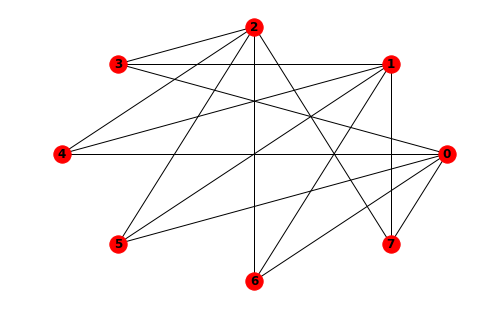

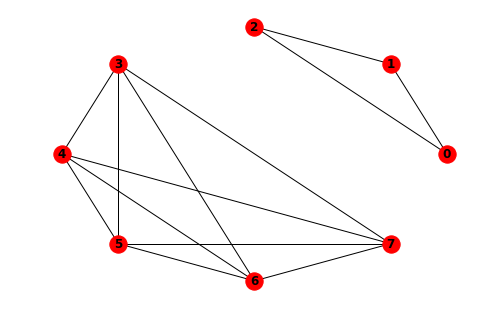

In [53]:
positions = nx.shell_layout(K35)

plt.figure(0)
nx.draw(K35, positions, with_labels=True, font_weight='bold')

plt.figure(1)
nx.draw(K35c, positions, with_labels=True, font_weight='bold')

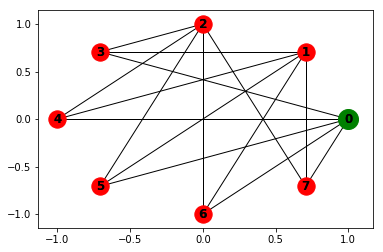

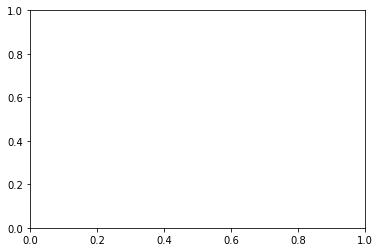

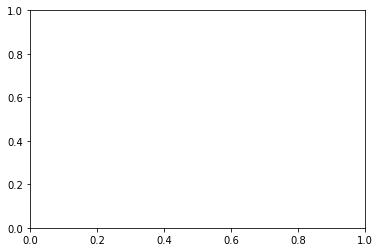

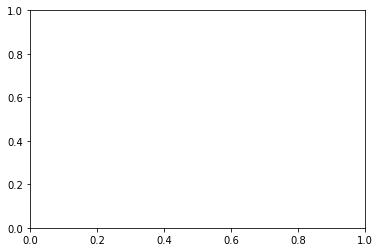

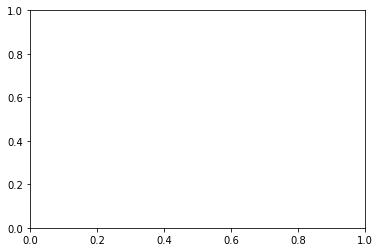

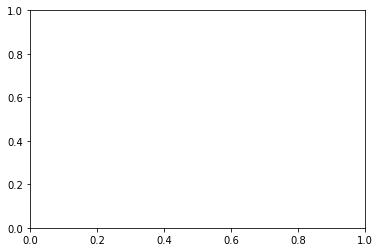

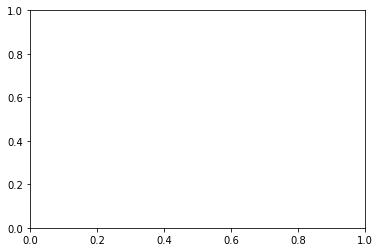

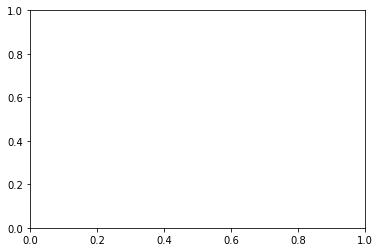

In [62]:
positions = nx.shell_layout(K35)

plt.figure(0)
ax = plt.gca()

for i in range(8):
    
    plt.cla()
    nx.draw_networkx(K35, positions, ax=ax, with_labels=True, font_weight='bold')
    nx.draw_networkx(K35, positions, ax=ax, nodelist=[i], edgelist=[], node_size=400, node_color='g')
    plt.show()
    time.sleep(2)


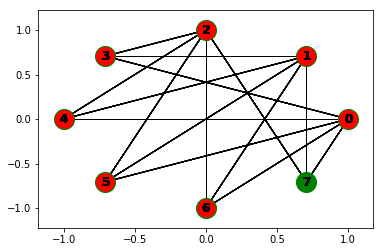

In [74]:
from matplotlib import animation, rc
from IPython.display import HTML

positions = nx.shell_layout(K35)

fig, ax = plt.subplots()

def init():
    nx.draw_networkx(K35, positions, ax=ax, with_labels=True, font_weight='bold')
    return []

def animate(i):
    nx.draw_networkx(K35, positions, ax=ax, with_labels=True, font_weight='bold')
    nx.draw_networkx(K35, positions, ax=ax, nodelist=[i], edgelist=[], node_size=400, node_color='g')
    return []

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=8, interval=200, blit=True)

HTML(anim.to_jshtml())

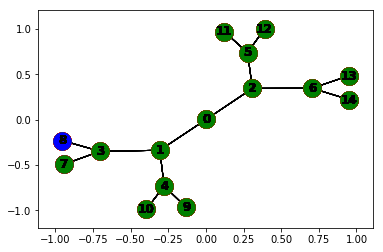

In [104]:
tree = nx.balanced_tree(2, 3)

fig, ax = plt.subplots()
positions = nx.spring_layout(tree)
#nx.draw_networkx(tree, positions, ax=ax, with_labels=True, font_weight='bold')

N = len(tree.nodes)
stack = [0]
visits = np.zeros(N, dtype=bool)
history = []

while len(stack) > 0:
    node = stack.pop()
    if not visits[node]:
        visits[node] = True
        stack += list(tree[node])
        history += [(node, visits.copy())]


nodes = np.array(tree.nodes)
nodes[visits]

def frame(i):
    node, visits = history[i]    
    nx.draw_networkx(tree, positions, ax=ax, with_labels=True, font_weight='bold')
    nx.draw_networkx(tree, positions, ax=ax, nodelist=list(nodes[visits]), edgelist=[], node_color='g')
    nx.draw_networkx(tree, positions, ax=ax, nodelist=[node], edgelist=[], node_color='b')
    return []

def init():
    nx.draw_networkx(tree, positions, ax=ax, with_labels=True, font_weight='bold')
    return []

anim = animation.FuncAnimation(fig, frame, init_func=init, frames=len(history), interval=800, blit=True)

HTML(anim.to_jshtml())